In [10]:
import config
from again_model import AgainVC
import torch
from matplotlib import pyplot as plt
from IPython.display import Audio
from dataset import VCTK_092_CUSTOM
from torchaudio.datasets.utils import extract_archive
import torchaudio

In [ ]:
%%time 
# 6 min
extract_archive(config.ARCHIVE_PATH,'VCTK-Corpus-0.92')

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
again_model = AgainVC(config.ENCODER_PARAMS,config.DECODER_PARAMS,config.ACTIVATION_PARAMS)
again_model.to(device);

In [4]:
again_model.load_state_dict(torch.load('./AgainVC/best.pth', map_location='cpu')['model_state_dict'])

<All keys matched successfully>

In [5]:
vocoder = torch.hub.load('descriptinc/melgan-neurips', 'load_melgan')

Using cache found in /root/.cache/torch/hub/descriptinc_melgan-neurips_master


In [100]:
test_ds = VCTK_092_CUSTOM(config.DATASET_PATH, config.TEST_SPEAKER_IDS)
train_ds = VCTK_092_CUSTOM(config.DATASET_PATH, config.TRAIN_SPEAKER_IDS)

# Проверка переноса стиля на трейне

/content/dataset.py:136: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mel).log10().float()


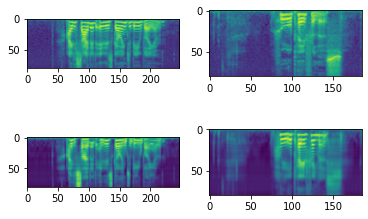

In [131]:
first, second = (6430, 12324)
audio_1_2 = vocoder.inverse(train_ds[first]).cpu().numpy().flatten()
audio_2_1 = vocoder.inverse(train_ds[second]).cpu().numpy().flatten()
res_1_2 = again_model(train_ds[first], train_ds[second])
res_2_1 = again_model(train_ds[second], train_ds[first])
audio_res_1_2 = vocoder.inverse(res_1_2).cpu().numpy().flatten()
audio_res_2_1 = vocoder.inverse(res_2_1).cpu().numpy().flatten()


f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(train_ds[first].squeeze())
axarr[0,1].imshow(train_ds[second].squeeze())
axarr[1,0].imshow(res_1_2.squeeze().detach().numpy())
axarr[1,1].imshow(res_2_1.squeeze().detach().numpy())

In [132]:
Audio(audio_1_2, rate=22050, embed=True)

In [133]:
Audio(audio_2_1, rate=22050, embed=True)

In [134]:
Audio(audio_res_1_2, rate=22050, embed=True)

In [135]:
Audio(audio_res_2_1, rate=22050, embed=True)

# Проверка переноса стиля на тесте

/content/dataset.py:136: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mel).log10().float()


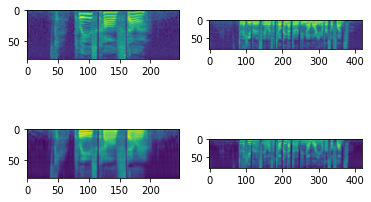

In [101]:
first, second = (800, 3013)
audio_1_2 = vocoder.inverse(test_ds[first]).cpu().numpy().flatten()
audio_2_1 = vocoder.inverse(test_ds[second]).cpu().numpy().flatten()
res_1_2 = again_model(test_ds[first], test_ds[second])
res_2_1 = again_model(test_ds[second], test_ds[first])
audio_res_1_2 = vocoder.inverse(res_1_2).cpu().numpy().flatten()
audio_res_2_1 = vocoder.inverse(res_2_1).cpu().numpy().flatten()


f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(test_ds[first].squeeze())
axarr[0,1].imshow(test_ds[second].squeeze())
axarr[1,0].imshow(res_1_2.squeeze().detach().numpy())
axarr[1,1].imshow(res_2_1.squeeze().detach().numpy())

In [102]:
Audio(audio_1_2, rate=22050, embed=True)

In [103]:
Audio(audio_2_1, rate=22050, embed=True)

In [104]:
Audio(audio_res_1_2, rate=22050, embed=True)

In [105]:
Audio(audio_res_2_1, rate=22050, embed=True)

# Проверка на своих дорожках


In [ ]:
def wav2mel(file_path):
  data, sample_rate = torchaudio.load(file_path)
  mel = torchaudio.transforms.Resample(sample_rate, 22050)(data)
  mel = torchaudio.transforms.MelSpectrogram(22050, 1024, 1024, 256, n_mels=80)(mel)
  return mel.log10()


In [ ]:
mel_1 = wav2mel('./samples/PU.wav')
mel_2 = wav2mel('./samples/NV.wav')

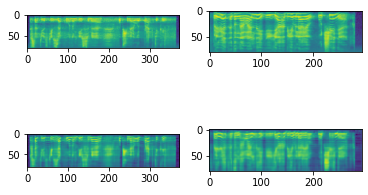

In [137]:
audio_1_2 = vocoder.inverse(mel_1).cpu().numpy().flatten()
audio_2_1 = vocoder.inverse(mel_2).cpu().numpy().flatten()
res_1_2 = again_model(mel_1, mel_2)
res_2_1 = again_model(mel_2, mel_1)
audio_res_1_2 = vocoder.inverse(res_1_2).cpu().numpy().flatten()
audio_res_2_1 = vocoder.inverse(res_2_1).cpu().numpy().flatten()


f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(mel_1.squeeze())
axarr[0,1].imshow(mel_2.squeeze())
axarr[1,0].imshow(res_1_2.squeeze().detach().numpy())
axarr[1,1].imshow(res_2_1.squeeze().detach().numpy())

In [138]:
Audio(audio_1_2, rate=22050, embed=True)

In [139]:
Audio(audio_2_1, rate=22050, embed=True)

In [140]:
Audio(audio_res_1_2, rate=22050, embed=True)

In [141]:
Audio(audio_res_2_1, rate=22050, embed=True)